In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [4]:
data_2012 = data[pd.Series(map(lambda x:"2012" in x,data["date_time"]))]

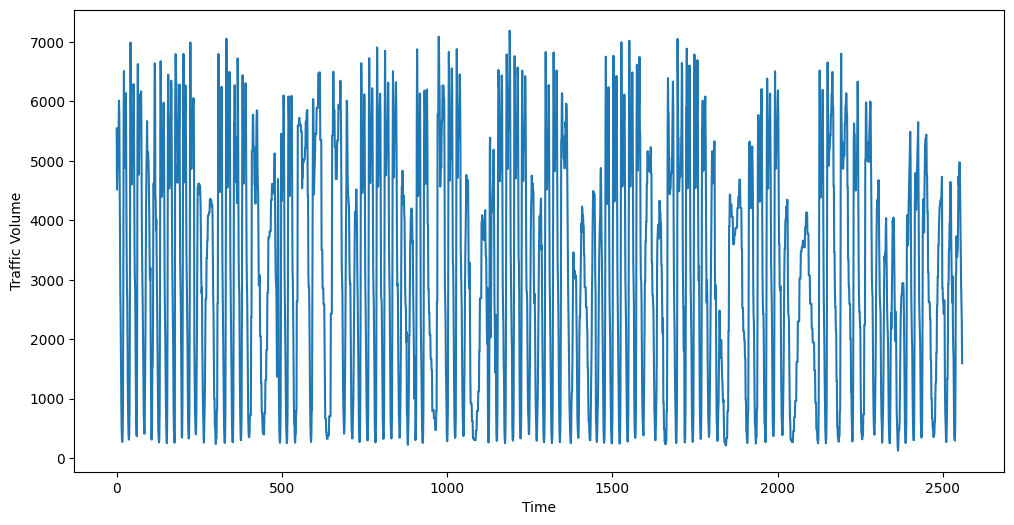

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data_2012["traffic_volume"])
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.show()

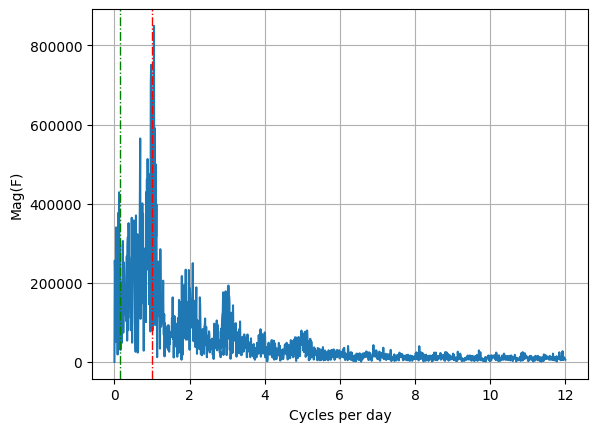

In [6]:
FFT = np.fft.fft(data_2012["traffic_volume"])
#FFT = fft.fftshift(FFT)
X = np.linspace(0,24/2,len(FFT)//2)
F = abs(FFT)[0:len(FFT)//2]
F[0] = 0
plt.plot(X,F)
plt.xlabel("Cycles per day")
plt.ylabel("Mag(F)")
plt.axvline(x=1, color='red', linestyle='-.',linewidth=1)
plt.axvline(x=1/7, color='green', linestyle='-.',linewidth=1)
plt.grid()

/home/gautham/Desktop/ML_project/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


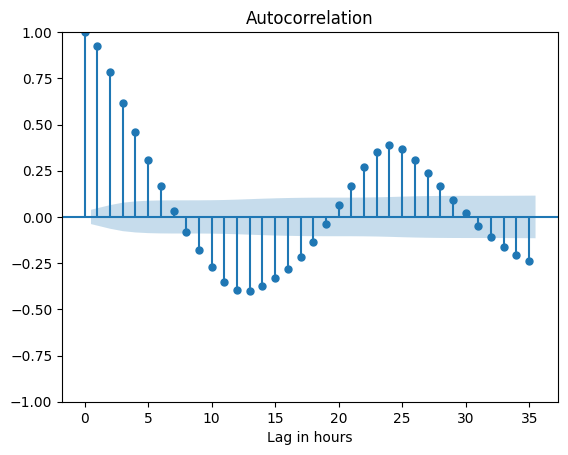

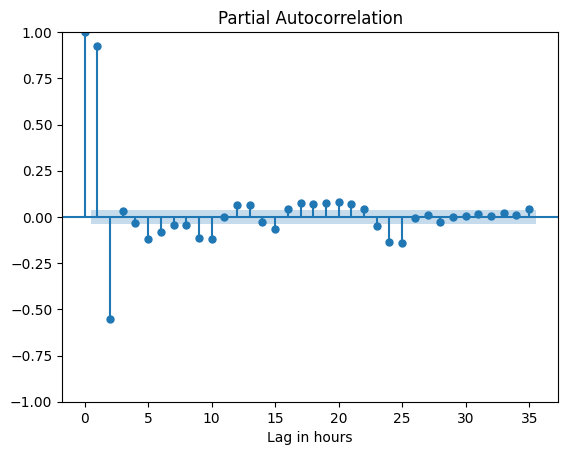

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_2012["traffic_volume"])
plt.xlabel("Lag in hours")
plot_pacf(data_2012["traffic_volume"])
plt.xlabel("Lag in hours")
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    adf_result = adfuller(timeseries)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')
    if adf_result[0] < adf_result[4]['5%']:
        print('Data is stationary')
    else:
        print('Data is non-stationary')
adf_test(data_2012["traffic_volume"])

ADF Statistic: -10.215246602059066
p-value: 5.50341246368357e-18
Critical Values:
   1%: -3.43293324257297
   5%: -2.8626812695784225
   10%: -2.5673775408540145
Data is stationary
